<a href="https://colab.research.google.com/github/carlos-alves-one/-SSDM-Coursework-1/blob/main/Regression_CW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Goldsmiths University of London
### MSc. Data Science and Artificial Intelligence
### Module: Statistics and Statistical Data Mining
### Author: Carlos Manuel De Oliveira Alves
### Student: cdeol003
### Coursework No.1

### Load the data

> Run the code in Python 3

In [1]:
# Imports the 'drive' module from 'google.colab' and mounts the Google Drive to
# the '/content/drive' directory in the Colab environment.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


> Run the code in R

In [1]:
# Loading necessary library
library(readr)

# Loading the datasets using base R read.csv function
student_mat <- read.csv("/content/drive/MyDrive/student/student-mat.csv", sep = ";")
student_por <- read.csv("/content/drive/MyDrive/student/student-por.csv", sep = ";")

# Displaying the first few rows of the Mathematics dataset
head(student_mat)

# Displaying the first few rows of the Portuguese dataset
head(student_por)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,6,5,6,6
2,GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,4,5,5,6
3,GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,10,7,8,10
4,GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,2,15,14,15
5,GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,4,6,10,10
6,GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,10,15,15,15


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,4,0,11,11
2,GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,2,9,11,11
3,GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,6,12,13,12
4,GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,0,14,14,14
5,GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,0,11,13,13
6,GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,6,12,12,13


Dataset source: https://archive.ics.uci.edu/dataset/320/student+performance

License: This dataset is licensed under a https://creativecommons.org/licenses/by/4.0/legalcode (CC BY 4.0) license.

##Task No.1
Describe the regression problem you tackle in this coursework, namely what is the purpose
of your analysis

The regression problem with this dataset, involving student performance in secondary education, is centred around predicting a student's final year grade (G3) in two subjects: Mathematics (mat) and Portuguese language (por). This prediction is based on various explanatory variables provided in the dataset. Let us break down the critical aspects of this regression problem:

###Objective of the Analysis

The regression analysis primarily aims to predict students' final grades (G3).

This prediction can inform understanding of:

- Student Performance: Understanding factors that contribute to higher or lower final grades.

- Educational Interventions: Identifying areas where students might require more support or resources.

- Policy Making: Informing educational policies and teaching strategies to improve student outcomes.

###Nature of the Regression Problem

- Target Variable: The target variable for the regression model is 'G3', the final year grade, which is a continuous numeric value.

- Type of Regression: Since the target variable is continuous, this is a typical regression problem (as opposed to a classification problem).

###Predictor Variables

This analysis will consider various independent variables, which could include:

- Demographic Factors: Age, sex, and address of the students.

- Family Background: Parents' education level, job, family size, etc.

- School-Related Features: Absences, past failures, extra educational support, etc.

- Lifestyle Factors: Going out, weekday alcohol consumption, etc.

- Previous Performance: First and second-period grades (G1 and G2). However, considering the strong correlation with G3, we might explore models including and excluding these variables.



##Task No.2
Randomly split the dataset in 3 equal parts: the training set, the validation set and the test set.

The provided R script reads two datasets, student-mat.csv and student-por.csv, from a specified directory and merges them into a single dataframe based on standard columns like school, sex, age, and others. The merging process creates a combined dataset by aligning rows from both files with matching values in these critical columns. Finally, the script displays the total number of rows in the merged dataset and the first few rows for initial inspection.

###Merge the CSV Files

In [2]:
# Read the 'student-mat.csv' file into a dataframe 'd1'. The file is separated by semicolons and includes a header row
d1 = read.table("/content/drive/MyDrive/student/student-mat.csv", sep=";", header=TRUE)

# Read the 'student-por.csv' file into a dataframe 'd2'. This file is also separated by semicolons and includes a header row
d2 = read.table("/content/drive/MyDrive/student/student-por.csv", sep=";", header=TRUE)

# Merge the dataframes 'd1' and 'd2' into a new dataframe 'dataset'
# The merge is performed on columns: school, sex, age, address, famsize,
# Pstatus, Medu, Fedu, Mjob, Fjob, reason, nursery, and internet
# These columns are used as keys for merging, meaning rows will be combined when these columns have matching values in both 'd1' and 'd2'
dataset = merge(d1, d2, by=c("school", "sex", "age", "address", "famsize", "Pstatus", "Medu", "Fedu", "Mjob", "Fjob", "reason", "nursery", "internet"))

# Print the number of rows in the merged dataframe 'd3'. This gives an idea of how many entries are there in the merged dataset.
print(nrow(dataset))

# Display the first few rows (default is 6) of the merged dataframe 'd3'. This is useful for a quick inspection of the merged data, its structure, and its columns.
head(dataset)


[1] 382


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel.y,freetime.y,goout.y,Dalc.y,Walc.y,health.y,absences.y,G1.y,G2.y,G3.y
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,GP,F,15,R,GT3,T,1,1,at_home,other,⋯,3,1,2,1,1,1,4,13,13,13
2,GP,F,15,R,GT3,T,1,1,other,other,⋯,3,3,4,2,4,5,2,13,11,11
3,GP,F,15,R,GT3,T,2,2,at_home,other,⋯,4,3,1,1,1,2,8,14,13,12
4,GP,F,15,R,GT3,T,2,4,services,health,⋯,4,3,2,1,1,5,2,10,11,10
5,GP,F,15,R,GT3,T,3,3,services,services,⋯,4,2,1,2,3,3,2,13,13,13
6,GP,F,15,R,GT3,T,3,4,services,health,⋯,4,3,2,1,1,5,2,11,12,12


###Random Slipt the Dataset

The script loads the `dplyr` library for data manipulation, sets a random seed for reproducibility, and shuffles a dataset to ensure random distribution. It then divides the randomized dataset into three equal parts for training, validation, and testing, a standard practice in machine learning for model development and evaluation. This approach ensures that each subset is representative of the overall dataset, facilitating practical model training and performance assessment.

In [3]:
# Load necessary library
library(dplyr)

# Set seed for reproducibility
set.seed(123)

# Shuffle the dataset
dataset <- dataset[sample(nrow(dataset)), ]

# Split the dataset into three equal parts
part_size <- nrow(dataset) / 3
train_set <- dataset[1:part_size, ]
validation_set <- dataset[(part_size + 1):(2 * part_size), ]
test_set <- dataset[(2 * part_size + 1):nrow(dataset), ]



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




##Task No.3
Understanding the data: Using the training set, provide number of records and number of variables; mention the names of input attributes (independent variables) and their types and provide percentage of missing values; mention the output attribute (dependent variable) and its type. Compute variable correlations. Draw scatterplots with variables to visually.

###Number of Records and Variables
This step involves finding out the number of rows (records) and columns (variables) in the training set.

In [5]:
# Number of records and variables in the training set
num_records <- nrow(train_set)
num_variables <- ncol(train_set)
cat("Number of records....:", num_records, "\n")
cat("Number of variables..:", num_variables, "\n")


Number of records....: 127 
Number of variables..: 53 


###Input Attributes and Their Types
Identify the names of the input attributes (independent variables), and mention their types.

In [6]:
# Names and types of input attributes
input_attributes <- names(train_set)
attribute_types <- sapply(train_set, class)
cat("Input Attributes and Their Types:\n")
print(data.frame(Attribute = input_attributes, Type = attribute_types))


Input Attributes and Their Types:
                Attribute      Type
school             school character
sex                   sex character
age                   age   integer
address           address character
famsize           famsize character
Pstatus           Pstatus character
Medu                 Medu   integer
Fedu                 Fedu   integer
Mjob                 Mjob character
Fjob                 Fjob character
reason             reason character
nursery           nursery character
internet         internet character
guardian.x     guardian.x character
traveltime.x traveltime.x   integer
studytime.x   studytime.x   integer
failures.x     failures.x   integer
schoolsup.x   schoolsup.x character
famsup.x         famsup.x character
paid.x             paid.x character
activities.x activities.x character
higher.x         higher.x character
romantic.x     romantic.x character
famrel.x         famrel.x   integer
freetime.x     freetime.x   integer
goout.x           goout.x   in

###Percentage of Missing Values
Calculate the percentage of missing values in each column.

In [7]:
# Percentage of missing values for each variable
missing_values <- sapply(train_set, function(x) sum(is.na(x)) / length(x) * 100)
cat("Percentage of Missing Values:\n")
print(data.frame(Attribute = input_attributes, MissingPercentage = missing_values))


Percentage of Missing Values:
                Attribute MissingPercentage
school             school                 0
sex                   sex                 0
age                   age                 0
address           address                 0
famsize           famsize                 0
Pstatus           Pstatus                 0
Medu                 Medu                 0
Fedu                 Fedu                 0
Mjob                 Mjob                 0
Fjob                 Fjob                 0
reason             reason                 0
nursery           nursery                 0
internet         internet                 0
guardian.x     guardian.x                 0
traveltime.x traveltime.x                 0
studytime.x   studytime.x                 0
failures.x     failures.x                 0
schoolsup.x   schoolsup.x                 0
famsup.x         famsup.x                 0
paid.x             paid.x                 0
activities.x activities.x                 0
hi

###Output Attribute (Dependent Variable)
Identify the output attribute (dependent variable) and its type. Usually, this is specified in the context of the data or the analysis goal.

In [8]:
# Assuming 'G3' as the output variable (final grade)
output_variable <- "G3"  # Replace with the actual output variable if different
output_type <- class(train_set[[output_variable]])
cat("Output Attribute:", output_variable, "\n")
cat("Type:", output_type, "\n")


Output Attribute: G3 
Type: NULL 


###Compute Variable Correlations

####Print the Correlation Matrix

In [17]:
# Install and load the pander package
if (!require("pander")) install.packages("pander")
library(pander)

# Calculate the correlation matrix for all numeric variables in the training set
correlation_matrix <- cor(train_set[, sapply(train_set, is.numeric)])

# Use pander to create a more readable and attractive table in the console
pander(round(correlation_matrix, 2))



Loading required package: pander

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘pander’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)





|      &nbsp;      |  age  | Medu  | Fedu  | traveltime.x | studytime.x |
|:----------------:|:-----:|:-----:|:-----:|:------------:|:-----------:|
|     **age**      |   1   | -0.11 | -0.15 |     0.11     |    -0.01    |
|     **Medu**     | -0.11 |   1   |  0.7  |    -0.19     |    -0.08    |
|     **Fedu**     | -0.15 |  0.7  |   1   |    -0.17     |    -0.01    |
| **traveltime.x** | 0.11  | -0.19 | -0.17 |      1       |    -0.06    |
| **studytime.x**  | -0.01 | -0.08 | -0.01 |    -0.06     |      1      |
|  **failures.x**  | 0.11  | -0.14 | -0.21 |     0.11     |    -0.08    |
|   **famrel.x**   | 0.07  | 0.06  | -0.05 |     0.1      |    0.08     |
|  **freetime.x**  | 0.16  | -0.06 | -0.11 |     0.02     |    -0.18    |
|   **goout.x**    | 0.21  | 0.03  | -0.01 |     0.09     |    -0.06    |
|    **Dalc.x**    | 0.09  | -0.02 | -0.09 |     0.28     |    -0.35    |
|    **Walc.x**    | 0.13  | -0.08 | -0.12 |     0.22     |    -0.29    |
|   **health.x**   | -0.1  | 0.06  |

####Plot the Correlation Matrix

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’




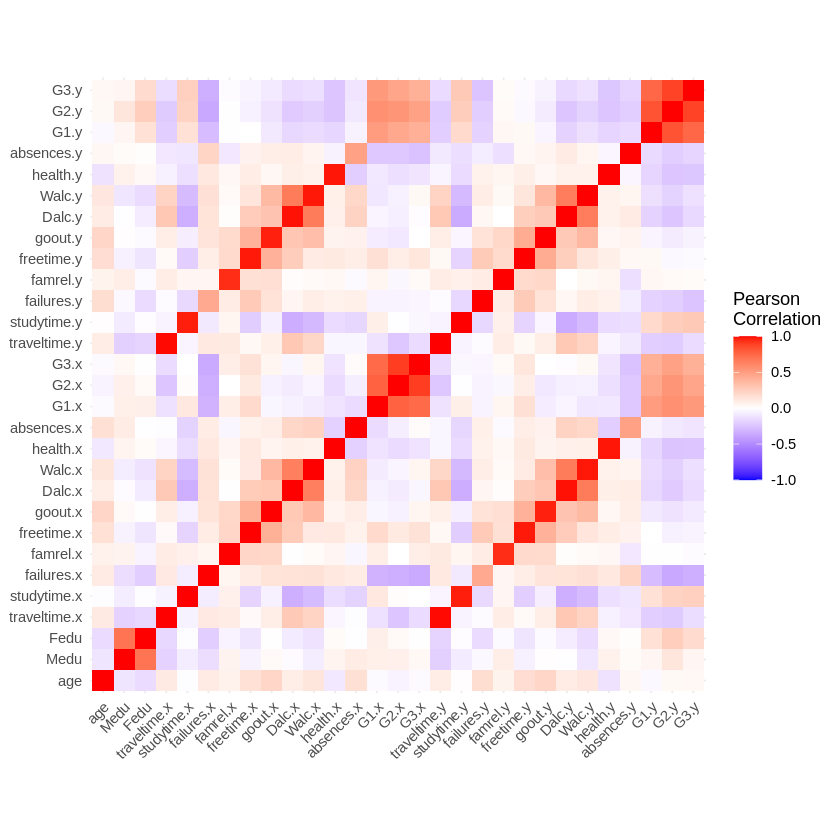

In [14]:
# Install the reshape2 package
install.packages("reshape2")

# Load necessary libraries
library(ggplot2)
library(reshape2)

# Calculate the correlation matrix for numeric columns
correlation_matrix <- cor(train_set[, sapply(train_set, is.numeric)])

# Melt the correlation matrix for ggplot2
melted_correlation_matrix <- melt(correlation_matrix)

# Create the heatmap
ggplot(melted_correlation_matrix, aes(Var1, Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white",
                       midpoint = 0, limit = c(-1,1), space = "Lab",
                       name="Pearson\nCorrelation") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        axis.title = element_blank()) +
  coord_fixed()


####List the Correlation Coefficients

1. age and Fedu: -0.15
2. Medu and Fedu: 0.7
3. traveltime.x and Fedu: -0.17
4. studytime.x and Dalc.x: -0.35
5. freetime.x and studytime.x: -0.18
6. goout.x and freetime.x: 0.41
7. Dalc.x and Walc.x: 0.65
8. G1.x and G2.x: 0.77
9. G2.x and G3.x: 0.9
10. G1.y and G2.y: 0.83



These correlation coefficients indicate the linear relationship between pairs of variables, with 1 meaning a perfect positive correlation, -1 meaning a perfect negative correlation, and 0 meaning no linear correlation. For example, the correlation coefficient of 0.7 between Medu and Fedu suggests a strong positive relationship. As the mother's education level (Medu) increases, the father's education level (Fedu) also increases. Conversely, the correlation of -0.35 between studytime.x and Dalc.x suggests a moderate negative relationship, indicating that as study time increases, daily alcohol consumption tends to decrease.

###Scatterplots for Variable Relationships
Draw scatterplots to visualize relationships between variables. This step requires identifying a few key variables to plot against each other.

In [10]:
# Listing the names of all variables in the training set
variable_names <- names(train_set)
print(variable_names)


 [1] "school"       "sex"          "age"          "address"      "famsize"     
 [6] "Pstatus"      "Medu"         "Fedu"         "Mjob"         "Fjob"        
[11] "reason"       "nursery"      "internet"     "guardian.x"   "traveltime.x"
[16] "studytime.x"  "failures.x"   "schoolsup.x"  "famsup.x"     "paid.x"      
[21] "activities.x" "higher.x"     "romantic.x"   "famrel.x"     "freetime.x"  
[26] "goout.x"      "Dalc.x"       "Walc.x"       "health.x"     "absences.x"  
[31] "G1.x"         "G2.x"         "G3.x"         "guardian.y"   "traveltime.y"
[36] "studytime.y"  "failures.y"   "schoolsup.y"  "famsup.y"     "paid.y"      
[41] "activities.y" "higher.y"     "romantic.y"   "famrel.y"     "freetime.y"  
[46] "goout.y"      "Dalc.y"       "Walc.y"       "health.y"     "absences.y"  
[51] "G1.y"         "G2.y"         "G3.y"        


####1. Final Grade vs Study Time

Plotting final grade (G3) against study time (studytime) can reveal if there is a correlation between the amount of time spent studying and academic performance.

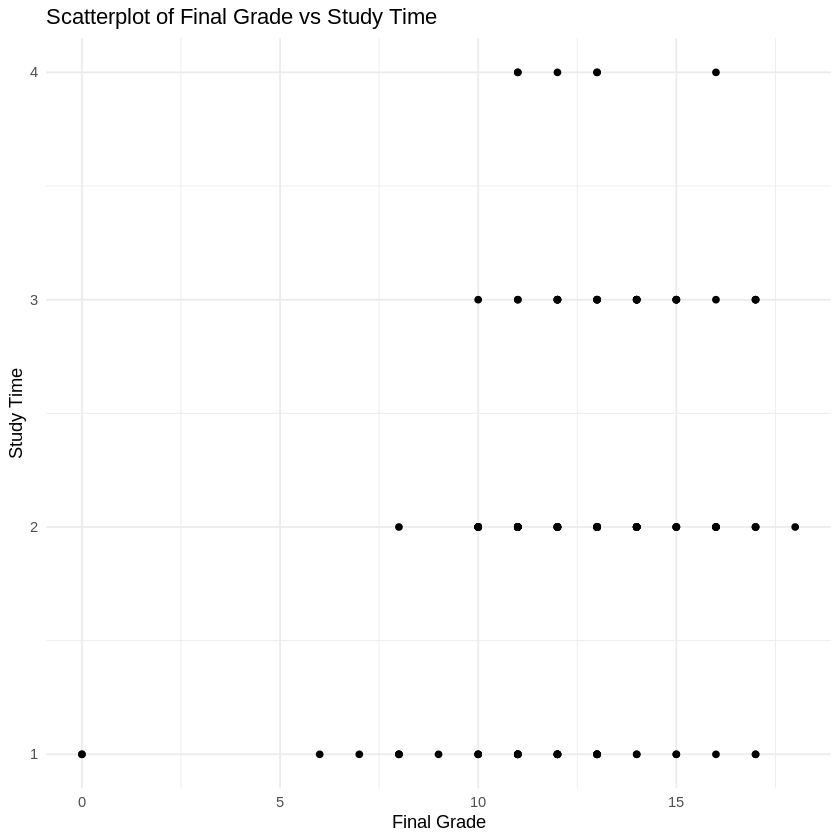

In [12]:
# Load necessary library for plotting
library(ggplot2)

# Scatterplot between Final Grade vs Study Time"
ggplot(train_set, aes(x = G3.y, y = studytime.y)) +  # Replace X and Y with variable names
  geom_point() +
  theme_minimal() +
  labs(title = "Scatterplot of Final Grade vs Study Time", x = "Final Grade", y = "Study Time")


TO DO: EXPLAIN RESULTS

####2. Absences vs Final Grade

Exploring the relationship between the number of absences (e.g., absences) and final grades (e.g., G3) can show how absenteeism impacts academic outcomes.

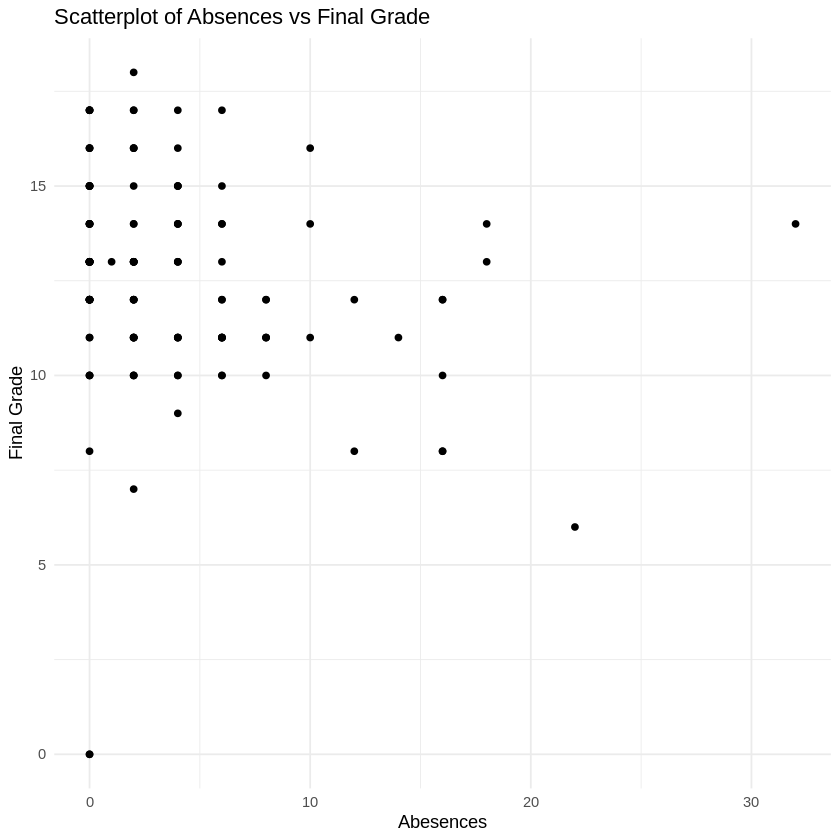

In [18]:
# Load necessary library for plotting
library(ggplot2)

# Scatterplot between Absences vs Final Grade"
ggplot(train_set, aes(x = absences.y, y = G3.y)) +  # Replace X and Y with variable names
  geom_point() +
  theme_minimal() +
  labs(title = "Scatterplot of Absences vs Final Grade", x = "Abesences", y = "Final Grade")


TO DO: EXPLAIN RESULTS

####3. Parental Education Level vs Final Grade

Comparing final grades with parental education levels (e.g., Medu for mother's education, Fedu for father's education) might indicate if there's a link between parents' education and student performance.

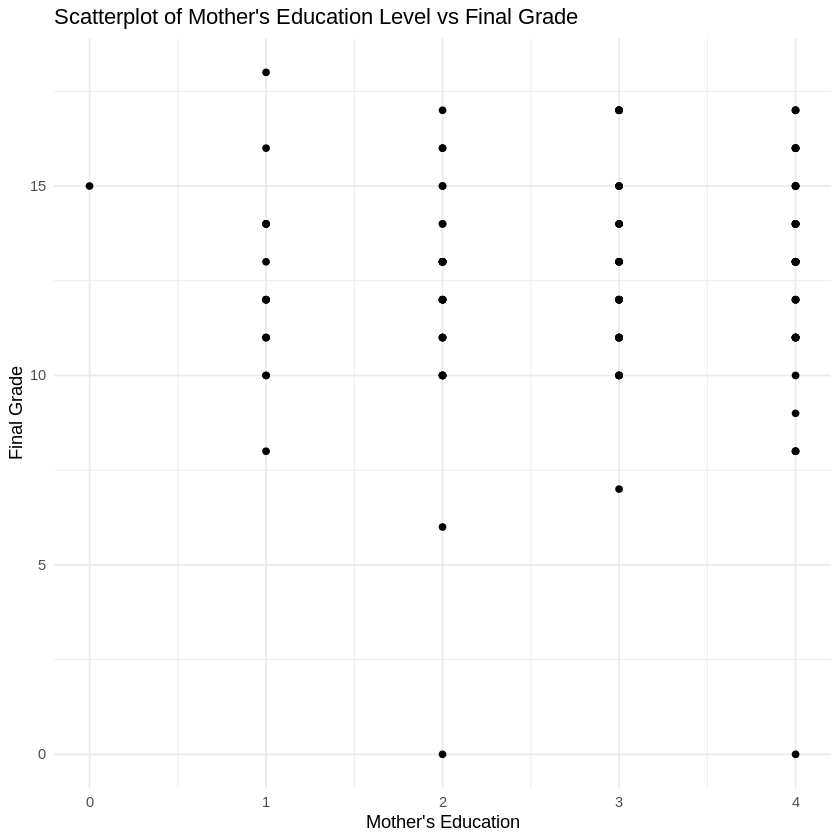

In [19]:
# Load necessary library for plotting
library(ggplot2)

# Scatterplot between Mother's Education vs Final Grade"
ggplot(train_set, aes(x = Medu, y = G3.y)) +  # Replace X and Y with variable names
  geom_point() +
  theme_minimal() +
  labs(title = "Scatterplot of Mother's Education Level vs Final Grade", x = "Mother's Education", y = "Final Grade")


TO DO: EXPLAIN RESULTS

####4. Weekly Alcohol Consumption vs Final Grade

Investigating the correlation between weekly alcohol consumption (e.g., Dalc for workday alcohol consumption, Walc for weekend alcohol consumption) and final grades could highlight the impact of alcohol usage on academic achievement.